In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import rasterio as rio
import seaborn as sns
import statsmodels.graphics.api as smg
import warnings
warnings.filterwarnings("ignore")

Forma:  (6998, 11757)
Valores únicos:  [1]


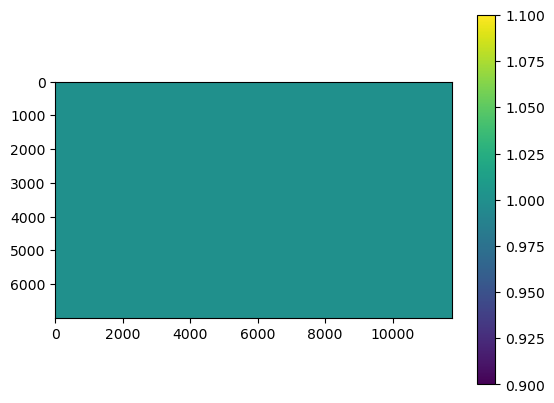

In [2]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\mov_binario.tif')
inventario=raster.read(1)
inventario=np.where(inventario == 65535,0,1)
plt.imshow(inventario)
plt.colorbar();

print('Forma: ', inventario.shape)
print('Valores únicos: ', np.unique(inventario))

In [3]:
print('Valores originales únicos:', np.unique(inventario))

Valores originales únicos: [1]


Forma: (6998, 11757)
Valores únicos: [0 1]
Valor NoData: 0.0


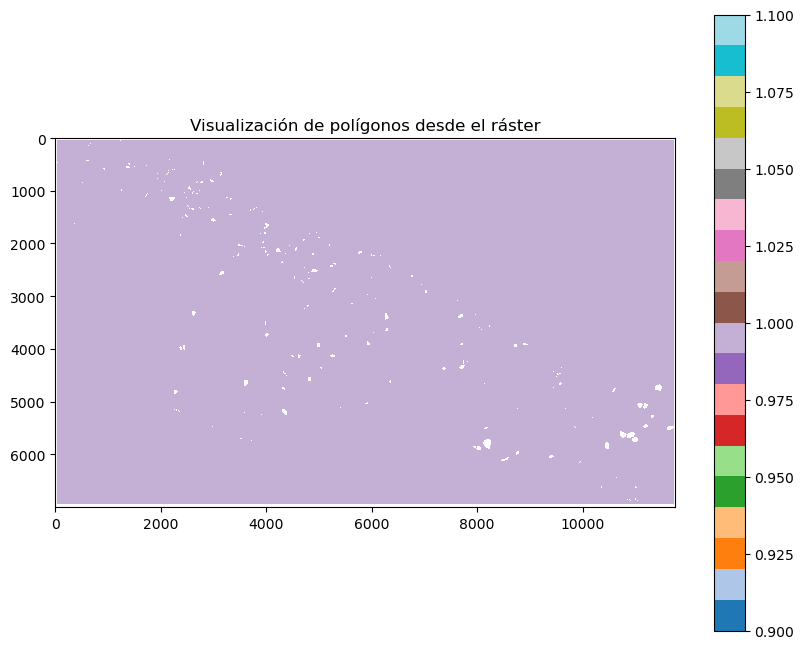

In [4]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Cargar el ráster
ruta = r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\mov_binario.tif'

with rio.open(ruta) as src:
    inventario = src.read(1)
    nodata = src.nodata

print("Forma:", inventario.shape)
print("Valores únicos:", np.unique(inventario))
print("Valor NoData:", nodata)

# Aplicar máscara si hay NoData
if nodata is not None:
    inventario = np.where(inventario == nodata, np.nan, inventario)

# Visualización
plt.figure(figsize=(10, 8))
plt.imshow(inventario, cmap='tab20', interpolation='none')
plt.colorbar()
plt.title('Visualización de polígonos desde el ráster')
plt.show()

Valor NoData: 0.0


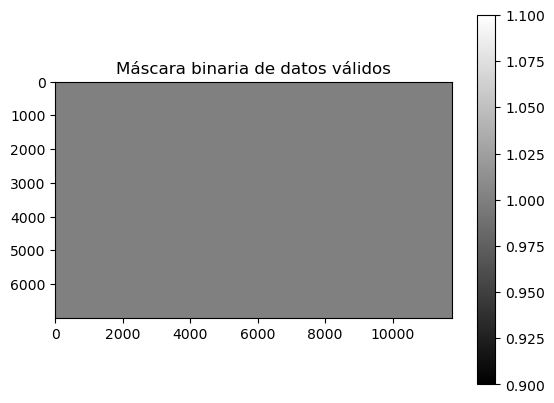

In [5]:
nodata = raster.nodata
print('Valor NoData:', nodata)

# Máscara binaria: 1 donde hay datos válidos, 0 donde hay NoData
mascara = np.where(inventario == nodata, 0, 1)

plt.imshow(mascara, cmap='gray')
plt.title('Máscara binaria de datos válidos')
plt.colorbar()

Forma:  (7969, 13231)
Valores únicos:  [1.]


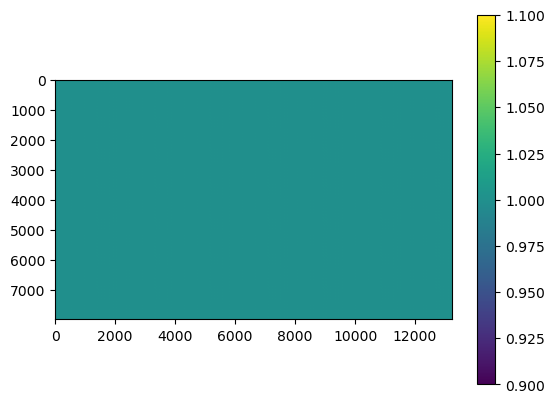

In [6]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,1)
plt.imshow(msk)
plt.colorbar();

print('Forma: ', msk.shape)
print('Valores únicos: ', np.unique(msk))

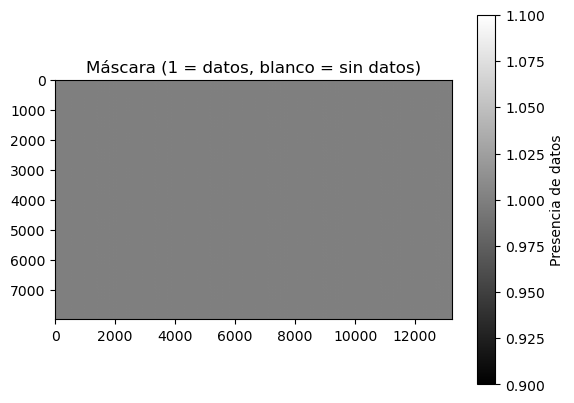

In [7]:
plt.imshow(msk, cmap='gray')
plt.title("Máscara (1 = datos, blanco = sin datos)")
plt.colorbar(label='Presencia de datos')
plt.show()

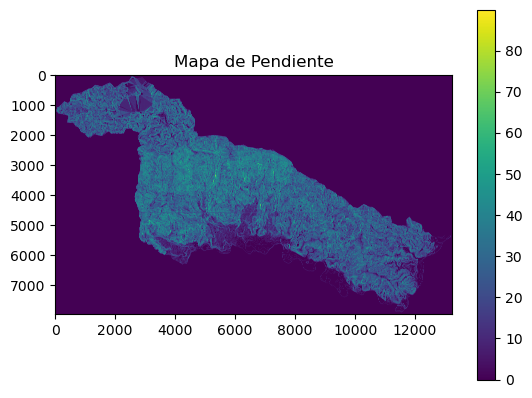

In [8]:
import rasterio as rio
import matplotlib.pyplot as plt

raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
pendiente = raster.read(1)

plt.imshow(pendiente, cmap='viridis')
plt.colorbar()
plt.title("Mapa de Pendiente")
plt.show()


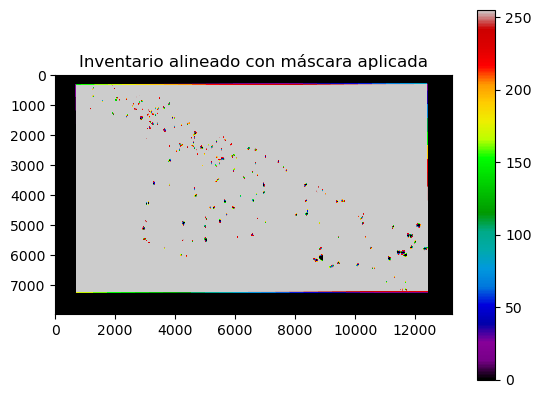

In [9]:
import numpy as np
import rasterio as rio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Abrir ráster de referencia (pendiente)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as src_ref:
    ref_shape = src_ref.read(1).shape
    ref_transform = src_ref.transform
    ref_crs = src_ref.crs
    msk = src_ref.read_masks(1)
    msk = np.where(msk == 0, np.nan, 1)

# Abrir ráster a alinear (inventario)
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Mov_mart\Mov_marte.tif') as src_inv:
    inventario = src_inv.read(1)
    aligned_inv = np.empty(ref_shape, dtype=inventario.dtype)

    reproject(
        source=inventario,
        destination=aligned_inv,
        src_transform=src_inv.transform,
        src_crs=src_inv.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.nearest
    )

# Aplicar la máscara
inventario1 = aligned_inv * msk

# Visualizar
plt.imshow(inventario1, cmap='nipy_spectral')
plt.colorbar()
plt.title("Inventario alineado con máscara aplicada")
plt.show()

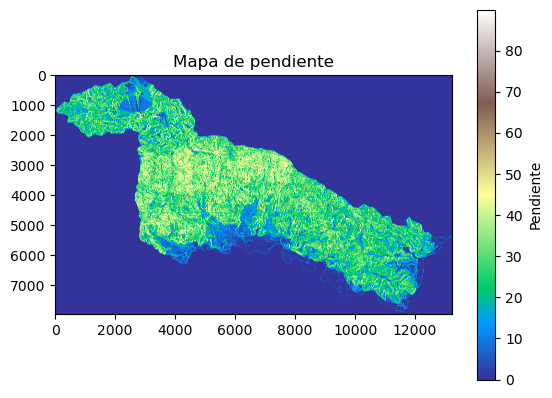

In [10]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el ráster
with rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif') as raster:
    slope = raster.read(1).astype(float)  # leer la banda 1 y convertir a float para poder tener NaNs

# Reemplazar valores negativos con NaN
slope = np.where(slope < 0, np.nan, slope)

# Visualizar
plt.imshow(slope, cmap='terrain')
plt.colorbar(label='Pendiente')
plt.title("Mapa de pendiente")
plt.show()

Forma:  (7969, 13231)
Valores únicos:  [0.0000000e+00 1.2363964e-03 2.4727928e-03 ... 8.9925980e+01 8.9925987e+01
 8.9926003e+01]


numpy.ndarray

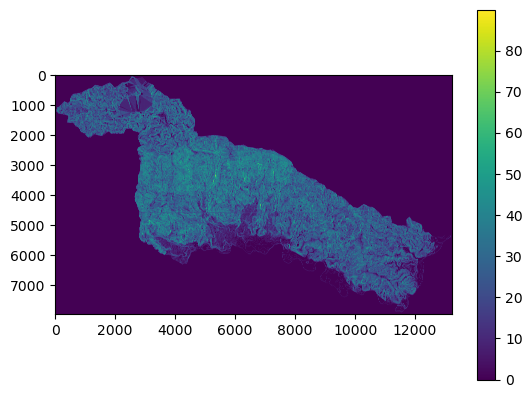

In [11]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Lunes_noche\pendiente.tif')
slope=raster.read(1)
slope=np.where(slope<0,np.nan,slope)
plt.imshow(slope)
plt.colorbar();

print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))
type(slope)

Forma:  (7969, 13231)
Valores únicos:  [0.00000000e+00 1.13173148e-04 1.21383986e-04 ... 3.59999664e+02
 3.59999878e+02            nan]


numpy.ndarray

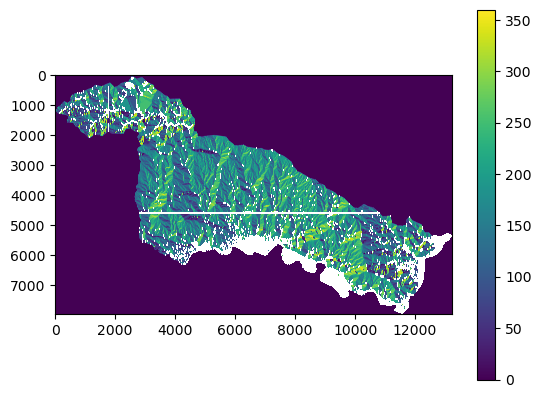

In [12]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Aspecto\Aspect.tif')
aspecto=raster.read(1)
#aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto=np.where(aspecto == aspecto.min(), np.nan, aspecto)
plt.imshow(aspecto)
plt.colorbar()

print('Forma: ', aspecto.shape)
print('Valores únicos: ', np.unique(aspecto))
type(aspecto)

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

numpy.ndarray

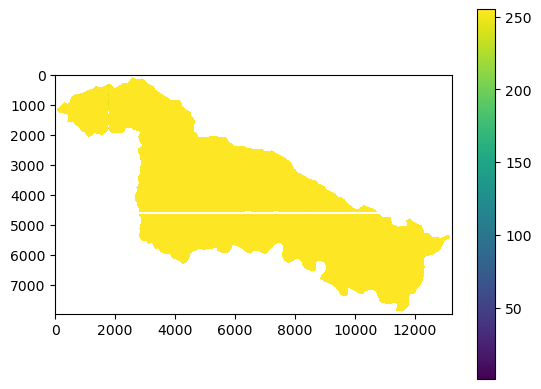

In [13]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo raster
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Curva_vert_hori\curv_verti.tif')
curverti = raster.read(1)

# Reemplazar el valor mínimo por NaN
curverti = np.where(curverti == curverti.min(), np.nan, curverti)

# Mostrar la imagen
plt.imshow(curverti)
plt.colorbar()

# Imprimir información
print('Forma: ', curverti.shape)
print('Valores únicos: ', np.unique(curverti))
type(curverti)

Forma:  (7969, 13231)
Valores únicos:  [ 59.  69. 105. 125. 141. 151. 177. 193. 209. 211. 212. 214. 215. 216.
 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230.
 231. 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243. 244.
 245. 246. 247. 248. 249. 250. 251. 252. 253. 254. 255.  nan]


numpy.ndarray

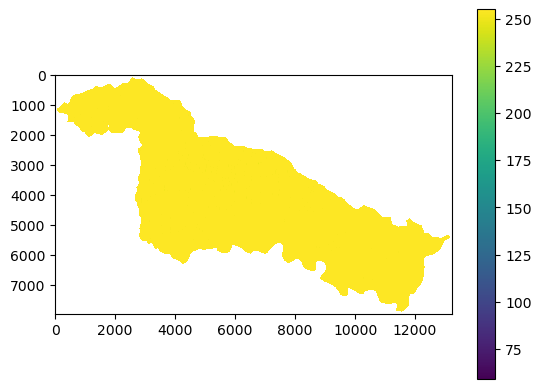

In [14]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo raster
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\Curva_vert_hori\Curv_hori.tif')
curvhori = raster.read(1)

# Reemplazar el valor mínimo por NaN
curvhori = np.where(curvhori == curvhori.min(), np.nan, curvhori)

# Mostrar la imagen
plt.imshow(curvhori)
plt.colorbar()

# Imprimir información
print('Forma: ', curvhori.shape)
print('Valores únicos: ', np.unique(curvhori))
type(curvhori)

Forma:  (7991, 13271)
Valores únicos:  [ 2.  4.  5.  7. 11. nan]


numpy.ndarray

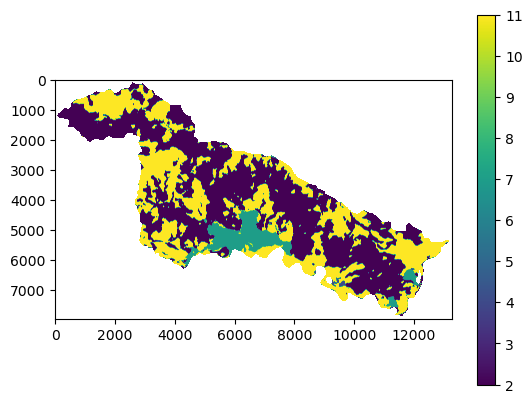

In [15]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo raster
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\cover\cov_reclasificado.tif')
cobertura = raster.read(1)

# Reemplazar el valor mínimo por NaN
cobertura = np.where(cobertura == cobertura.min(), np.nan, cobertura)

# Mostrar la imagen
plt.imshow(cobertura)
plt.colorbar()

# Imprimir información
print('Forma: ', cobertura.shape)
print('Valores únicos: ', np.unique(cobertura))
type(cobertura)


Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

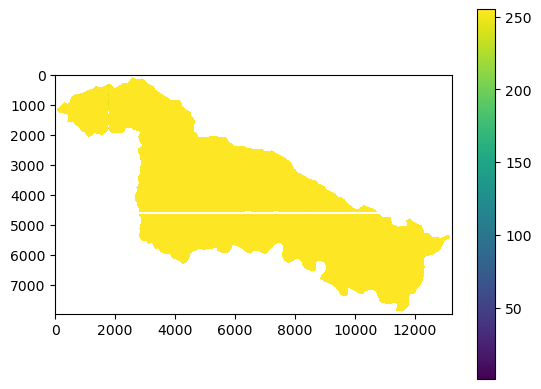

In [16]:
curverti1 = msk * curverti
plt.imshow(curverti1)
plt.colorbar();

print('Forma: ', curverti1.shape)
print('Valores únicos: ', np.unique(curverti1))

Forma:  (7969, 13231)
Valores únicos:  [ 59.  69. 105. 125. 141. 151. 177. 193. 209. 211. 212. 214. 215. 216.
 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230.
 231. 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243. 244.
 245. 246. 247. 248. 249. 250. 251. 252. 253. 254. 255.  nan]


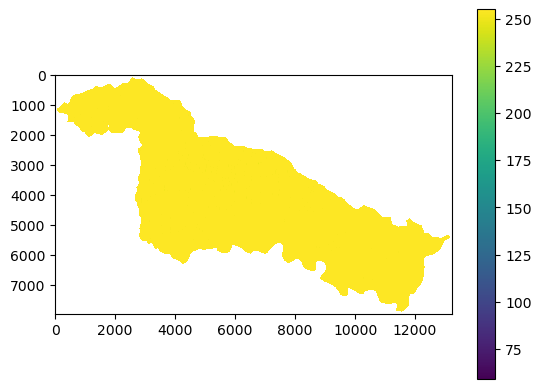

In [17]:
curvhori1 = msk * curvhori
plt.imshow(curvhori1)
plt.colorbar();

print('Forma: ', curvhori1.shape)
print('Valores únicos: ', np.unique(curvhori1))

Forma de cobertura: (7991, 13271)
Forma de msk: (7969, 13231)
Forma:  (7969, 13231)
Valores únicos:  [ 2.  4.  5.  7. 11. nan]


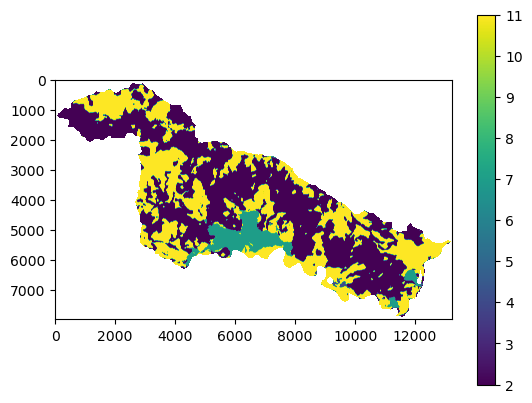

In [18]:
# Verifica las formas primero
print("Forma de cobertura:", cobertura.shape)
print("Forma de msk:", msk.shape)

# Obtener forma de la máscara
rows, cols = msk.shape

# Recortar cobertura al tamaño de la máscara
cobertura_recortada = cobertura[:rows, :cols]

# Aplicar la máscara
cobertura1 = msk * cobertura_recortada

# Mostrar resultado
plt.imshow(cobertura1)
plt.colorbar()
print('Forma: ', cobertura1.shape)
print('Valores únicos: ', np.unique(cobertura1))




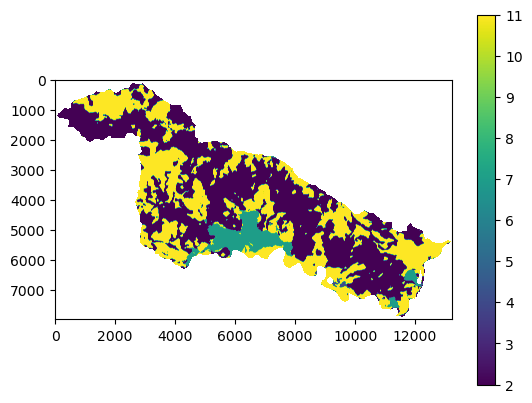

Forma: (7969, 13231)
Valores únicos: [ 2.  4.  5.  7. 11. nan]


In [19]:
# Obtener el mínimo de filas y columnas
rows = min(msk.shape[0], cobertura.shape[0])
cols = min(msk.shape[1], cobertura.shape[1])

# Recortar ambos arrays
msk_cropped = msk[:rows, :cols]
cobertura_cropped = cobertura[:rows, :cols]

# Multiplicar
cobertura1 = msk_cropped * cobertura_cropped

# Mostrar resultado
import matplotlib.pyplot as plt
plt.imshow(cobertura1)
plt.colorbar()
plt.show()

print('Forma:', cobertura1.shape)
print('Valores únicos:', np.unique(cobertura1))



Forma:  (7969, 13231)
Valores únicos:  [ 2.  4.  5.  7. 11. nan]


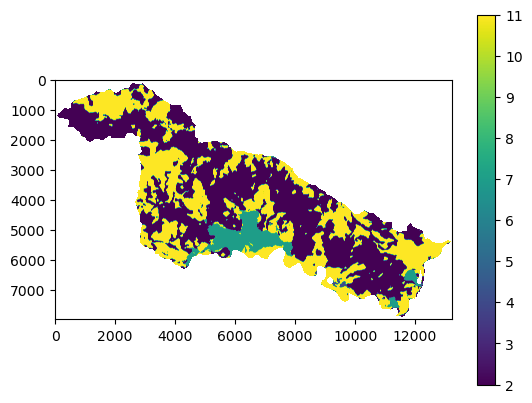

In [20]:
# Multiplicar las matrices recortadas
cobertura1 = msk_cropped * cobertura_cropped

# Mostrar la imagen resultante
plt.imshow(cobertura1)
plt.colorbar()

# Imprimir información
print('Forma: ', cobertura1.shape)
print('Valores únicos: ', np.unique(cobertura1))


(105437839,)

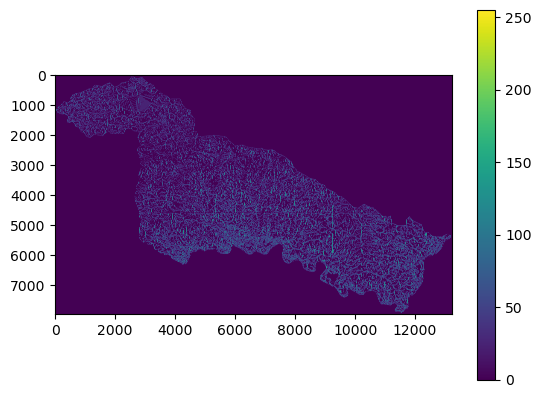

In [21]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\flujo\flujo_ac_lad.tif')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape

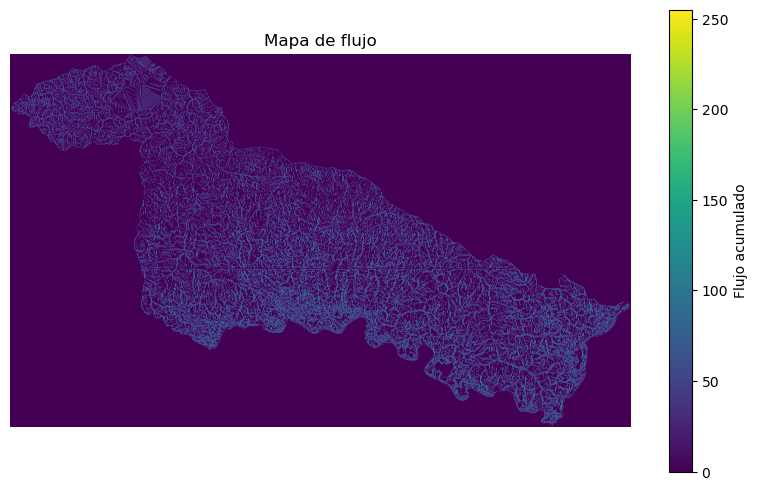

In [22]:
plt.figure(figsize=(10, 6))
plt.imshow(flujo, cmap='viridis')  # Puedes probar otros colormaps también
plt.colorbar(label='Flujo acumulado')
plt.title('Mapa de flujo')
plt.axis('off')
plt.show()

Forma:  (7969, 13231)
Valores únicos:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 18

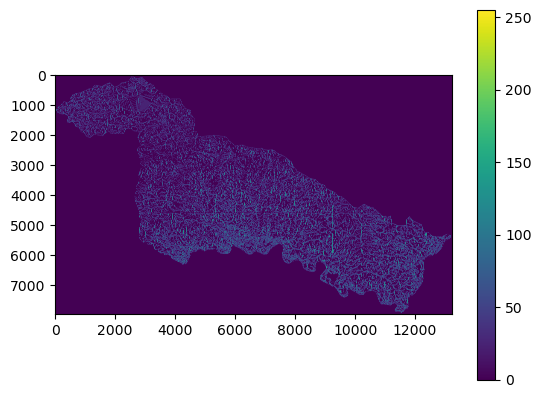

In [23]:
flujo1 = msk*flujo
plt.imshow(flujo1)
plt.colorbar();

print('Forma: ', flujo1.shape)
print('Valores únicos: ', np.unique(flujo1))

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

numpy.ndarray

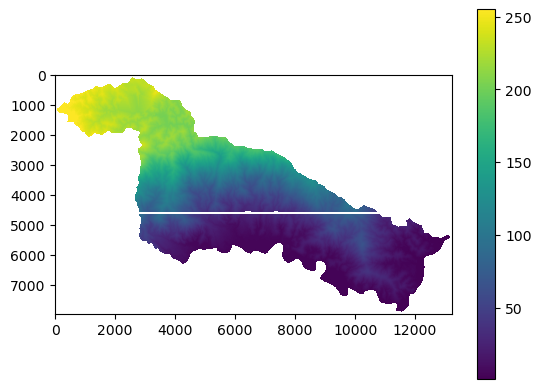

In [24]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\eleva\elevation.tif')
elevacion=raster.read(1)
elevacion=np.where(elevacion==0,np.nan,elevacion)
plt.imshow(elevacion)
plt.colorbar();

print('Forma: ', elevacion.shape)
print('Valores únicos: ', np.unique(elevacion))
type(elevacion)

Forma:  (7969, 13231)
Valores únicos:  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

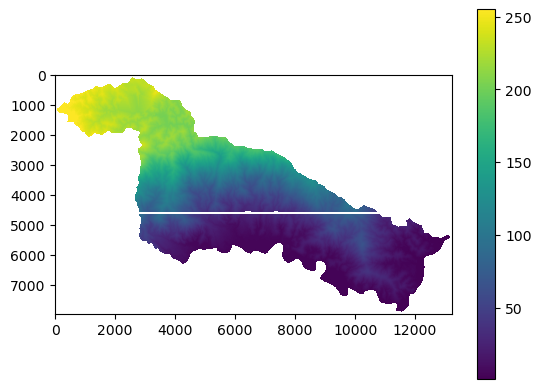

In [25]:
elevacion1 = msk*elevacion
plt.imshow(elevacion1)
plt.colorbar();

print('Forma: ', elevacion1.shape)
print('Valores únicos: ', np.unique(elevacion1))

Forma:  (7969, 13231)
Valores únicos:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


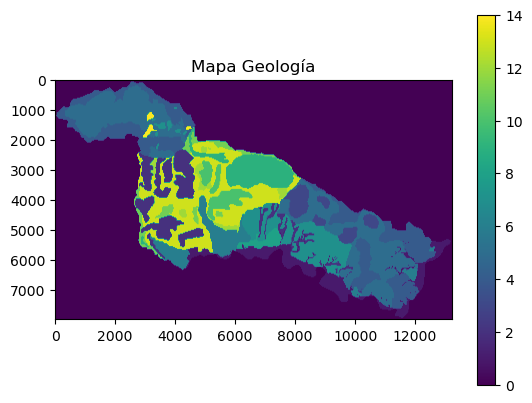

In [26]:
raster = rio.open(r'C:\Users\USUARIO\Desktop\Prueba\geolo_pro\geologia_reproyectada.tif')
geologia=raster.read(1)
geologia=np.where(geologia == 15,np.nan,geologia)
plt.imshow(geologia)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa Geología')
print('Forma: ', geologia.shape)
print('Valores únicos: ', np.unique(geologia))

Forma:  (7969, 13231)
Valores únicos:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


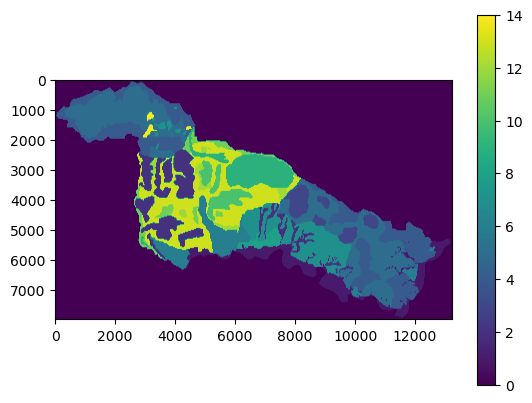

In [27]:
geologia1 = msk*geologia
plt.imshow(geologia1)
plt.colorbar();

print('Forma: ', geologia1.shape)
print('Valores únicos: ', np.unique(geologia1))

In [28]:
inventariovector = inventario1.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

aspectovector = aspecto.ravel()
print('Longitud aspectovector: ', aspectovector.shape[0])

curvertivector = curverti1.ravel()
print('Longitud curvertivector: ', curvertivector.shape[0])

curvhorivector = curvhori1.ravel()
print('Longitud curvhorivector: ', curvhorivector.shape[0])

flujovector = flujo1.ravel()
print('Longitud flujovector: ', flujovector.shape[0])

elevacionvector = elevacion1.ravel()
print('Longitud elevacionvector: ', elevacionvector.shape[0])

geologiavector = geologia1.ravel()
print('Longitud geologiavector: ', geologiavector.shape[0])

# Aquí agregamos cobertura1
cobertura1vector = cobertura1.ravel()
print('Longitud cobertura1vector: ', cobertura1vector.shape[0])


Longitud inventariovector:  105437839
Longitud slopevector:  105437839
Longitud aspectovector:  105437839
Longitud curvertivector:  105437839
Longitud curvhorivector:  105437839
Longitud flujovector:  105437839
Longitud elevacionvector:  105437839
Longitud geologiavector:  105437839
Longitud cobertura1vector:  105437839


In [29]:
import numpy as np

# Paso 1: Asegúrate de que todos los vectores están definidos
inventariovector = inventario1.ravel()
slopevector = slope.ravel()
aspectovector = aspecto.ravel()
curvertivector = curverti1.ravel()
curvhorivector = curvhori1.ravel()
flujovector = flujo1.ravel()
elevacionvector = elevacion1.ravel()
geologiavector = geologia1.ravel()
cobertura1vector = cobertura1.ravel()  # <-- agregado

# Paso 2: Apilamos todos los vectores en un array 2D (ahora con cobertura1vector)
stack = np.stack([
    inventariovector,
    slopevector,
    aspectovector,
    curvertivector,
    curvhorivector,
    flujovector,
    elevacionvector,
    geologiavector,
    cobertura1vector   # <-- agregado
], axis=1)

# Paso 3: Creamos una máscara que elimina filas con al menos un NaN
mask = ~np.any(np.isnan(stack), axis=1)

# Paso 4: Aplicamos la máscara a todos los datos a la vez
stack_clean = stack[mask]

# Paso 5: Separar nuevamente los vectores con sufijo MenM
inventariovectorMenM   = stack_clean[:, 0]
slopevectorMenM        = stack_clean[:, 1]
aspectovectorMenM      = stack_clean[:, 2]
curvertivectorMenM     = stack_clean[:, 3]
curvhorivectorMenM     = stack_clean[:, 4]
flujovectorMenM        = stack_clean[:, 5]
elevacionvectorMenM    = stack_clean[:, 6]
geologiavectorMenM     = stack_clean[:, 7]
cobertura1vectorMenM   = stack_clean[:, 8]   # <-- agregado

print('Longitud final (sin NaN en ninguna capa):', inventariovectorMenM.shape[0])


Longitud final (sin NaN en ninguna capa): 36180897


In [30]:
# Realizamos el DataFrame con las variables nuevas y sin curvatura, incluyendo Cobertura

diccionario = {
    'Inventario': inventariovectorMenM,
    'Pendiente': slopevectorMenM,
    'Aspectos': aspectovectorMenM,
    'Curvatura vertical': curvertivectorMenM,
    'Curvatura horizontal': curvhorivectorMenM,
    'Flujo': flujovectorMenM,
    'Elevación': elevacionvectorMenM,
    'Geología': geologiavectorMenM,
    'Cobertura': cobertura1vectorMenM   # <-- agregado aquí
}

df = pd.DataFrame(diccionario)
print(list(df.columns))

# df.tail(5)


['Inventario', 'Pendiente', 'Aspectos', 'Curvatura vertical', 'Curvatura horizontal', 'Flujo', 'Elevación', 'Geología', 'Cobertura']


In [31]:
df.head()

,Inventario,Pendiente,Aspectos,Curvatura vertical,Curvatura horizontal,Flujo,Elevación,Geología,Cobertura
0,0.0,0.000000,0.000000,254.0,254.0,0.0,238.0,0.0,2.0
1,0.0,25.097351,133.503098,255.0,255.0,102.0,238.0,0.0,2.0
2,0.0,0.000000,0.000000,255.0,255.0,36.0,238.0,0.0,2.0
3,0.0,0.000000,0.000000,255.0,255.0,0.0,238.0,0.0,2.0
4,0.0,21.167547,134.086761,255.0,255.0,234.0,238.0,0.0,2.0


In [32]:
#varContinuas = ['pendiente', 'curvatura', 'aspecto', 'altitud', 'flujo']
varContinuas = ['Pendiente', 'Aspectos', 'Elevación', 'Flujo']



In [33]:
dfLR = df.copy()

# Estandarización de variables continuas
for var in varContinuas:
    dfLR[var] = (dfLR[var] - dfLR[var].mean()) / dfLR[var].std()

dfLR.head()


,Inventario,Pendiente,Aspectos,Curvatura vertical,Curvatura horizontal,Flujo,Elevación,Geología,Cobertura
0,0.0,-2.333513,-2.163797,254.0,254.0,-0.415464,1.818871,0.0,2.0
1,0.0,-0.051220,-0.463769,255.0,255.0,1.283190,1.818871,0.0,2.0
2,0.0,-2.333513,-2.163797,255.0,255.0,0.184061,1.818871,0.0,2.0
3,0.0,-2.333513,-2.163797,255.0,255.0,-0.415464,1.818871,0.0,2.0
4,0.0,-0.408587,-0.456337,255.0,255.0,3.481447,1.818871,0.0,2.0


In [34]:
print(dfLR['Inventario'].unique())


[  0. 255.]


In [35]:
dfLR['Inventario'] = dfLR['Inventario'].apply(lambda x: 1 if x == 255 else 0)


In [36]:
print(dfLR['Inventario'].unique())

[0 1]


In [37]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "Inventario ~ Pendiente + Aspectos + Elevación + Flujo", data = dfLR).fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.164031
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             Inventario   No. Observations:             36180897
Model:                          Logit   Df Residuals:                 36180892
Method:                           MLE   Df Model:                            4
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                 0.03999
Time:                        18:04:42   Log-Likelihood:            -5.9348e+06
converged:                       True   LL-Null:                   -6.1820e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3143      0.001   3445.761      0.000       3.312       3.316
Pendiente      0.5723      0.

In [38]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "Inventario ~ Pendiente + Aspectos + Elevación + C(Cobertura)", data = dfLR).fit()
print(lr.summary())


Optimization terminated successfully.
         Current function value: 0.163271
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             Inventario   No. Observations:             36180897
Model:                          Logit   Df Residuals:                 36180889
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                 0.04444
Time:                        18:10:15   Log-Likelihood:            -5.9073e+06
converged:                       True   LL-Null:                   -6.1820e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4510      0.001   2630.750      0.000       3.448       3.45

In [42]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "Inventario ~ Pendiente + Aspectos + Elevación", data = dfLR).fit()
print(lr.summary())



Optimization terminated successfully.
         Current function value: 0.164118
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             Inventario   No. Observations:             36180897
Model:                          Logit   Df Residuals:                 36180893
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                 0.03948
Time:                        18:30:01   Log-Likelihood:            -5.9379e+06
converged:                       True   LL-Null:                   -6.1820e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3126      0.001   3447.792      0.000       3.311       3.314
Pendiente      0.5782      0.

In [ ]:
print("hola")

In [ ]:
modelFit_LR = model_LR.fit(X_LR, y_LR)
print(modelFit_LR.coef_)

#y_pred = result.predict(X1)
y_Prediccion = modelFit_LR.predict_proba(X_LR)
#y_Prediccion

y_Prediccion1 = modelFit_LR.predict_proba(X_LR)[:,1]
y_Prediccion1.max()

In [ ]:
import dask.array as da

slope_dask = da.from_array(slopevectorMenM, chunks=1_000_000)
pendienteVc1 = (slope_dask - da.nanmean(slope_dask)) / da.nanstd(slope_dask)
pendienteVc1 = pendienteVc1.compute()  # trae el resultado a memoria solo al final




In [ ]:
arr_dask = da.from_array(diccionario[var], chunks=(1_000_000,), asarray=False, inline_array=True)



In [ ]:
import dask.array as da
import numpy as np
import gc

diccionario_normalizado = {'Inventario': inventariovectorMenM}

variables_a_normalizar = ['Pendiente', 'Aspectos', 'Flujo', 'Elevación', 'Geología', 'Cobertura']

for var in variables_a_normalizar:
    print(f"Normalizando: {var}")
    try:
        arr = diccionario[var]
        arr_dask = da.from_array(arr, chunks=(1_000_000,), asarray=False, inline_array=True)
        zscore = (arr_dask - da.nanmean(arr_dask)) / da.nanstd(arr_dask)
        diccionario_normalizado[var] = zscore.compute()
        del arr, arr_dask, zscore
        gc.collect()  # fuerza liberación de memoria
    except Exception as e:
        print(f"Error en {var}: {e}")

# Añadir curvaturas sin modificar
diccionario_normalizado['Curvatura vertical'] = diccionario['Curvatura vertical']
diccionario_normalizado['Curvatura horizontal'] = diccionario['Curvatura horizontal']

# Convertir a DataFrame
df_normalizado = pd.DataFrame(diccionario_normalizado)


In [ ]:
pendienteVc2 = np.nan_to_num(slopevectorMenM)
aspectoVc2 = np.nan_to_num(aspectovectorMenM)
flujoVc2 = np.nan_to_num(flujovectorMenM)           
altitudVc2 = np.nan_to_num(elevacionvectorMenM)


In [ ]:
# Reemplazamos NaN con 0 para las variables deseadas
pendienteVc2 = np.nan_to_num(slopevectorMenM)
aspectoVc2 = np.nan_to_num(aspectovectorMenM)
flujoVc2 = np.nan_to_num(flujovectorMenM)
altitudVc2 = np.nan_to_num(elevacionvectorMenM)

# Creamos el diccionario con las variables ya sin NaN
f = {
    'pendiente': pendienteVc2,
    'aspectos': aspectoVc2,
    'flujo': flujoVc2,             
    'elevacion': altitudVc2
}

# Creamos el DataFrame
x_map = pd.DataFrame(f)

# Mostrar los primeros valores
x_map.head(51656)


In [ ]:
n = 1_000_000  # 1 millón de filas, o menos
f_sample = {
    'Pendiente': pendienteVc2[:n],
    'Aspectos': aspectoVc2[:n],
    'Flujo': flujoVc2[:n],
    'Elevación': altitudVc2[:n],
    'Cobertura': cobertura1vectorMenM[:n],
}

x_map_sample = pd.DataFrame(f_sample)



In [ ]:
print(model_LR.feature_names_in_)


In [ ]:
print(model_LR.feature_names_in_)


In [ ]:
model_LR.feature_names_in_



In [ ]:

# Diccionario de renombramiento para que coincidan con lo que espera el modelo
x_map.rename(columns={
    'pendiente': 'Pendiente',
    'aspectos': 'Aspectos',
    'curvatura vertical': 'Curvatura vertical',
    'curvatura horizontal': 'Curvatura horizontal',
    'flujo': 'Flujo',
    'elevacion': 'Elevación',
    'geologia': 'Geología',
    'cobertura': 'Cobertura'
}, inplace=True)



In [ ]:
print(x_map.columns.tolist())


